In [10]:
# libraries:

import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pprint

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import h2o

In [11]:
df = pd.read_csv("../Data/clean_idealista.csv")

## Preparing the dataset for training

In [12]:
def drop_columns(dataframe, columns_to_drop):

    return dataframe.drop(columns=columns_to_drop, errors='ignore')

columns_to_drop = ['ad_id','ad_latitude', 'ad_longitude','ad_neighbourhood','ad_town']
df = drop_columns(df, columns_to_drop)

In [13]:
df.sample(5)

,ad_typology_Value,ad_price,ad_area,ad_district,ad_builttype_Value,ad_roomnumber,ad_bathnumber,ad_haslift,ad_hasswimmingpool,ad_hasheating,ad_hasterrace,ad_hasparkingspace,ad_hasairconditioning,ad_hasgarden
15670,home,550000,56,Eixample,new development,2,1,1,0,0,1,0,0,0
4371,chalet,219000,85,Nou Barris,second hand / to be restored,3,1,0,0,0,1,0,0,1
2936,home,139000,54,Nou Barris,second hand / in good condition,2,1,1,0,0,1,0,0,0
11655,home,250000,90,Horta Guinardó,second hand / in good condition,4,1,1,0,0,0,0,0,0
23276,home,225000,52,Ciutat Vella,second hand / in good condition,2,1,1,0,0,0,0,0,0


In [14]:
df.describe()

,ad_price,ad_area,ad_roomnumber,ad_bathnumber,ad_haslift,ad_hasswimmingpool,ad_hasheating,ad_hasterrace,ad_hasparkingspace,ad_hasairconditioning,ad_hasgarden
count,3.971100e+04,39711.000000,39711.000000,39711.000000,39711.000000,39711.000000,39711.000000,39711.000000,39711.000000,39711.000000,39711.000000
mean,3.552958e+05,115.027876,2.843167,1.440382,0.723779,0.029438,0.473244,0.324469,0.099443,0.425650,0.036816
std,3.634011e+05,4993.007203,1.097985,0.670578,0.447133,0.169032,0.499290,0.468182,0.299260,0.494447,0.188312
min,8.000000e+02,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+05,64.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.800000e+05,79.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000e+05,100.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2.500000e+07,995000.000000,50.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


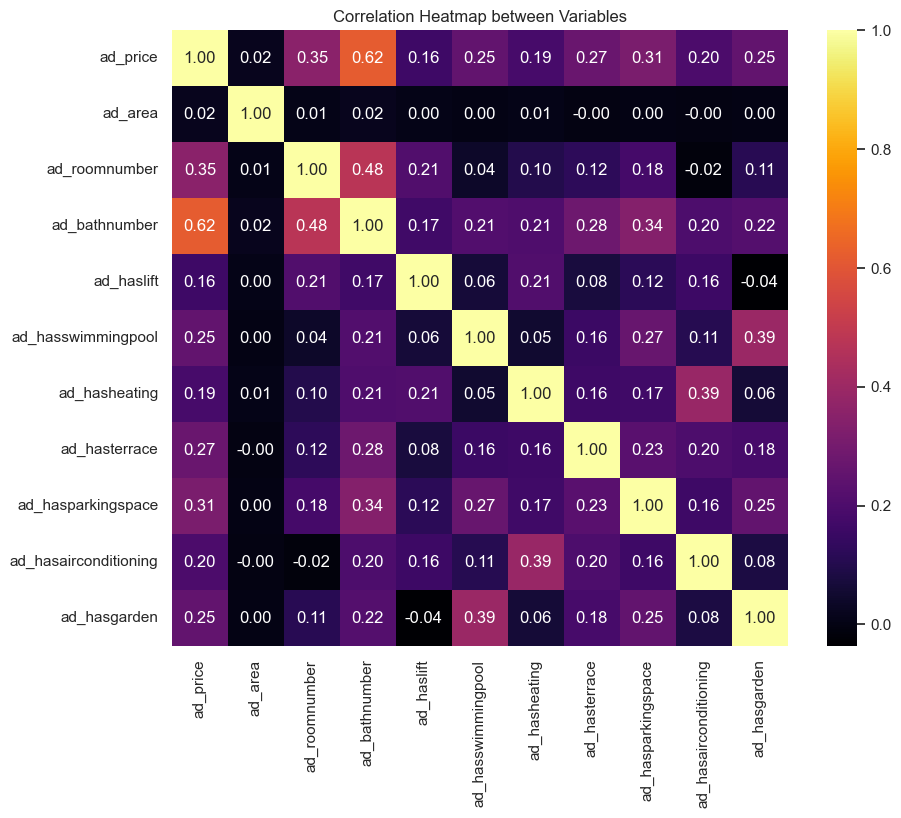

In [15]:
subset_corr = df[['ad_price', 'ad_area', 'ad_roomnumber', 'ad_bathnumber', 'ad_haslift', 'ad_hasswimmingpool', 'ad_hasheating', 'ad_hasterrace', 'ad_hasparkingspace', 'ad_hasairconditioning', 'ad_hasgarden']]
correlation_matrix = subset_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="inferno", fmt=".2f", square=True)
plt.title("Correlation Heatmap between Variables")
plt.show()

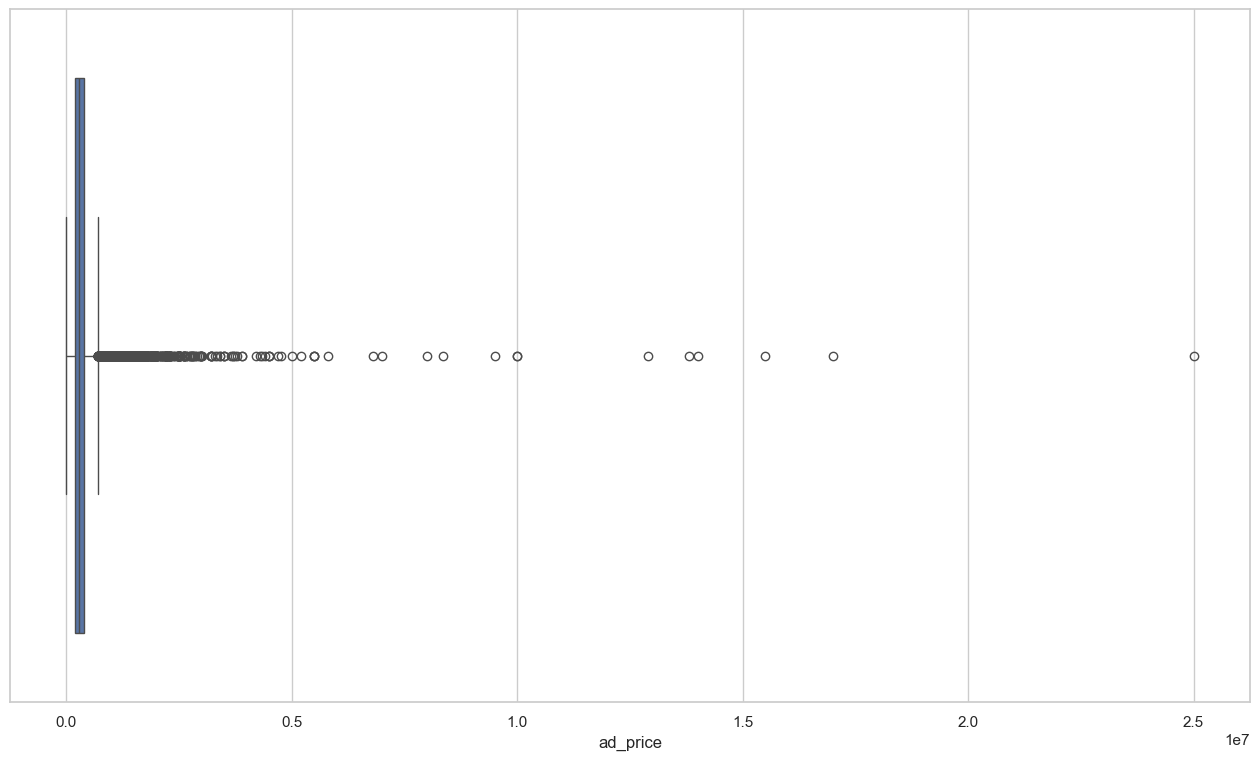

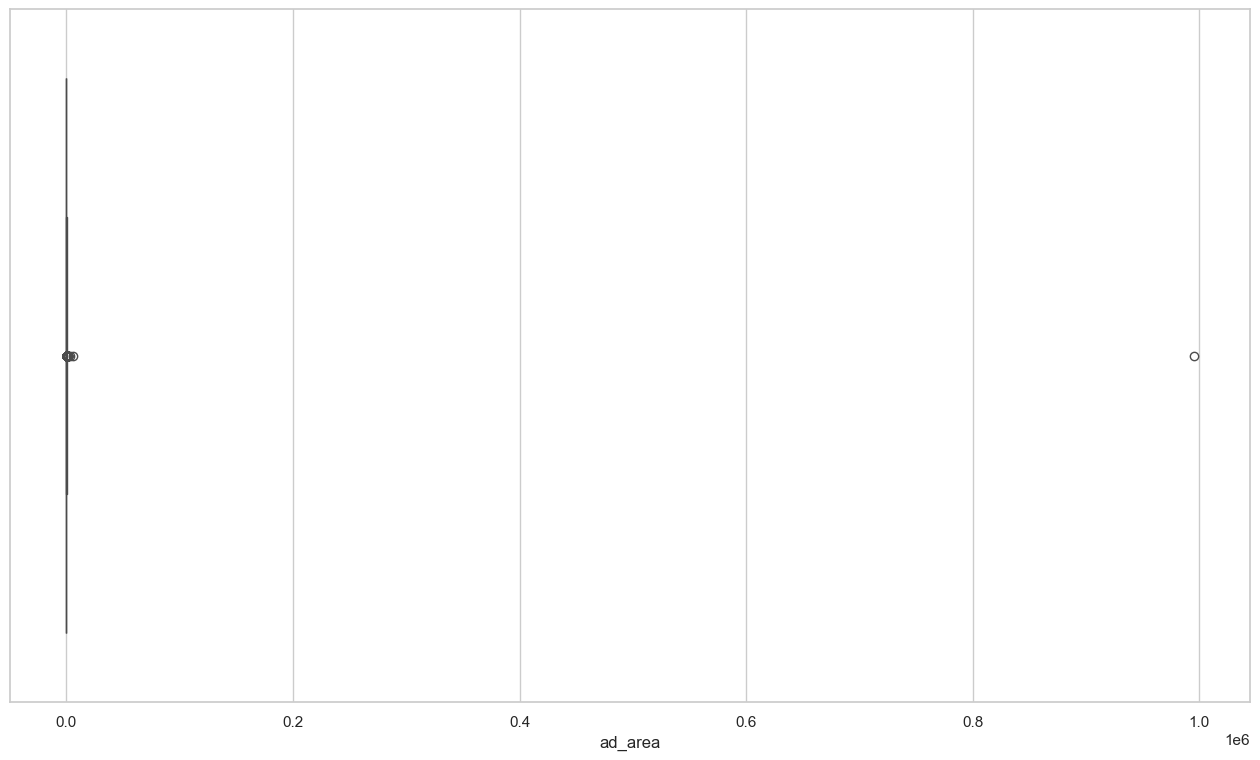

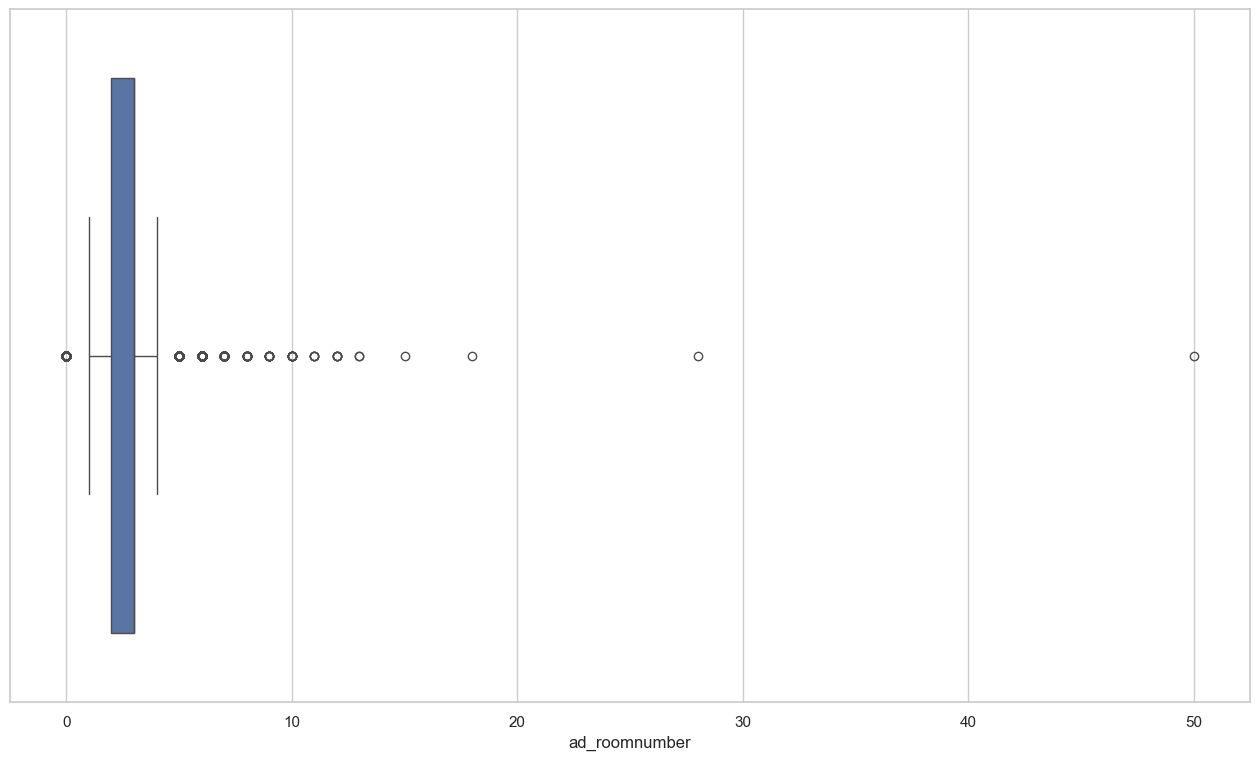

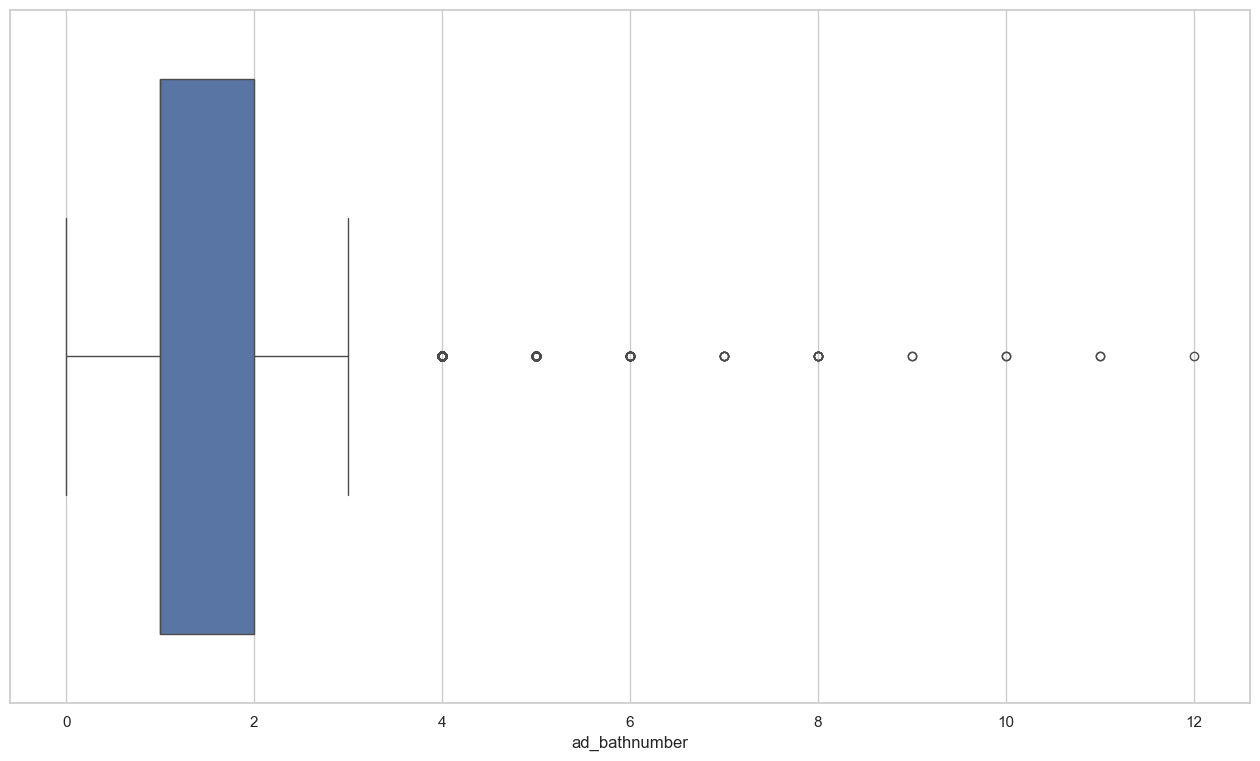

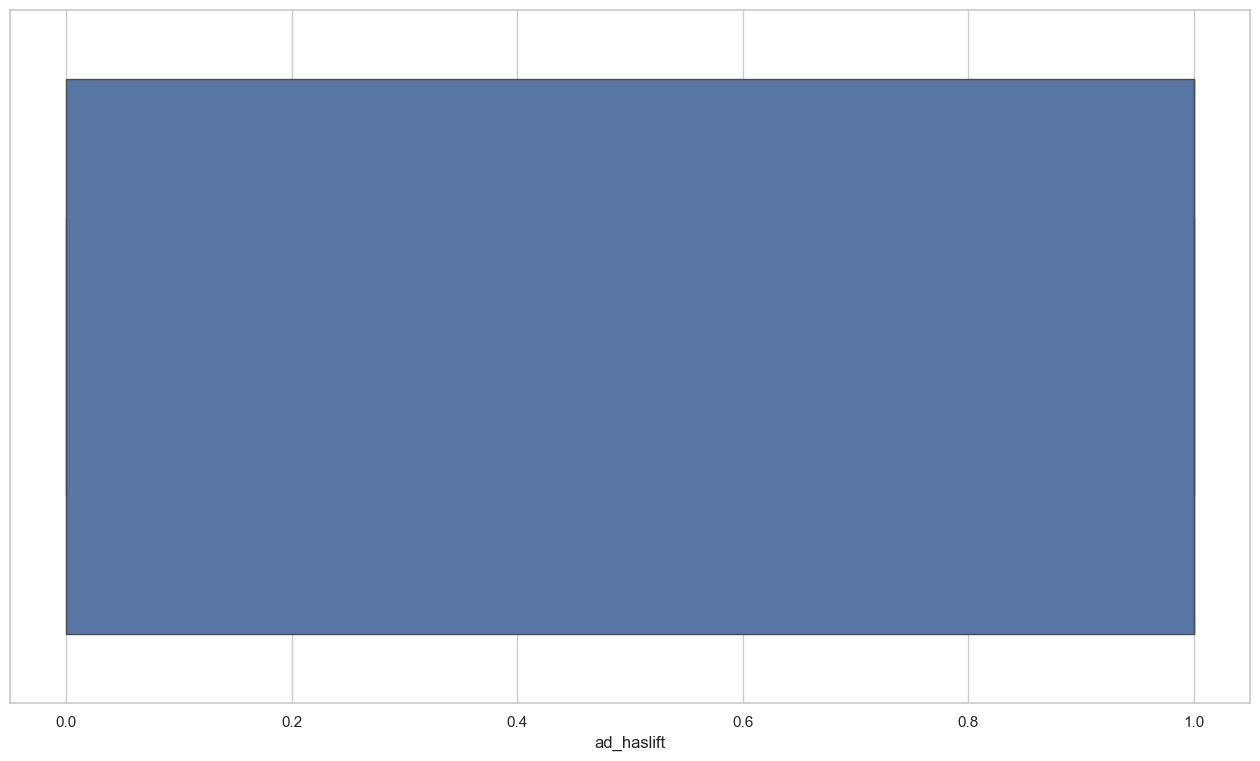

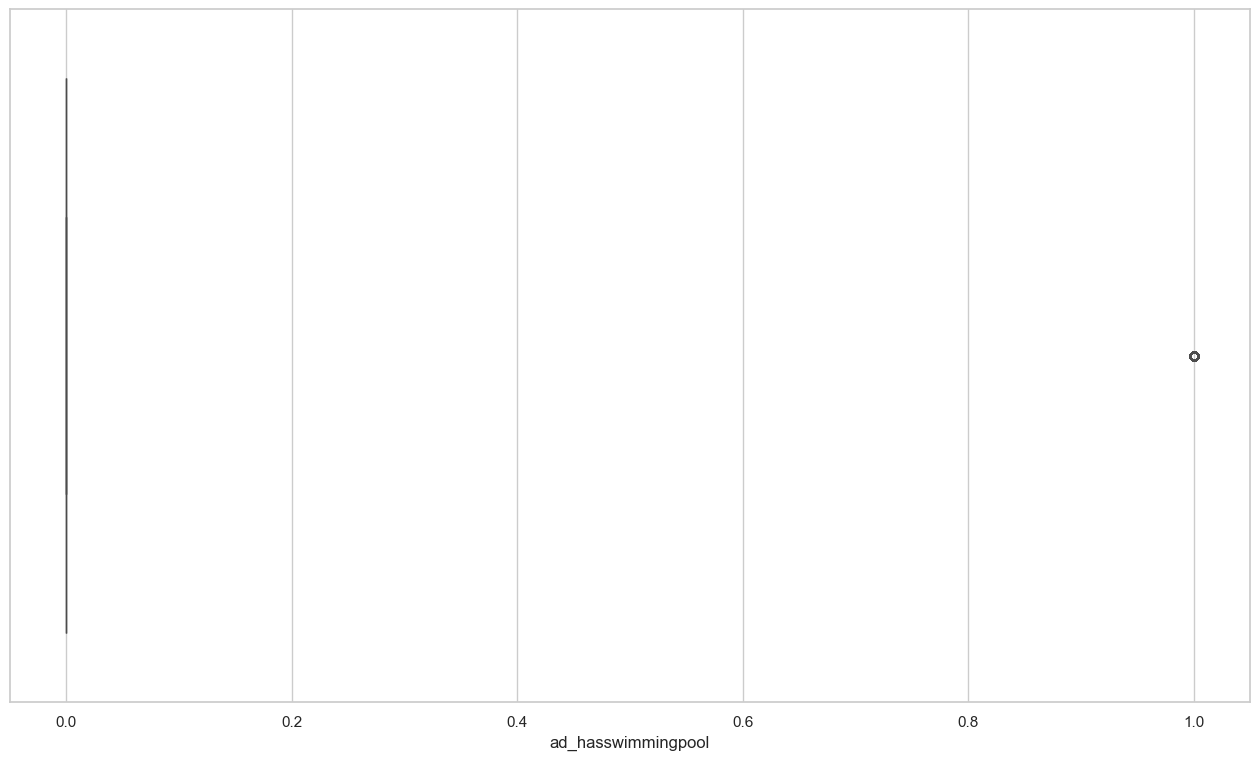

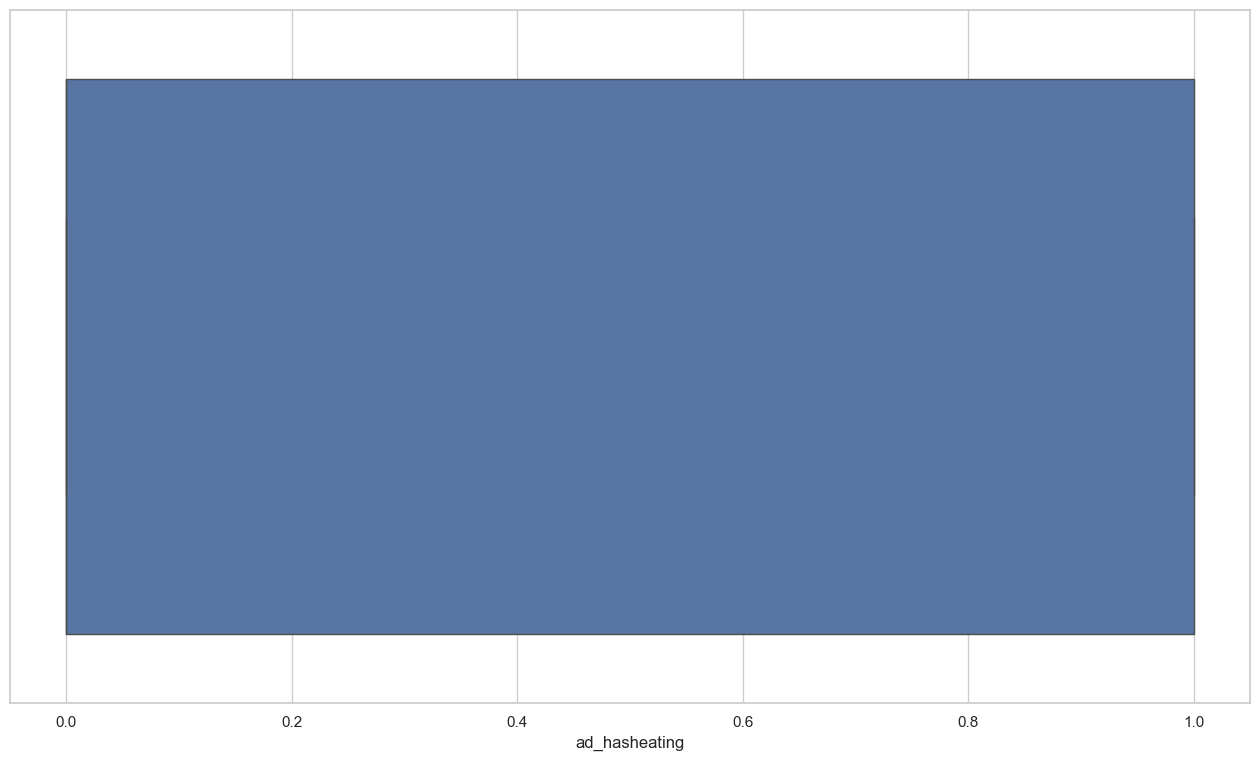

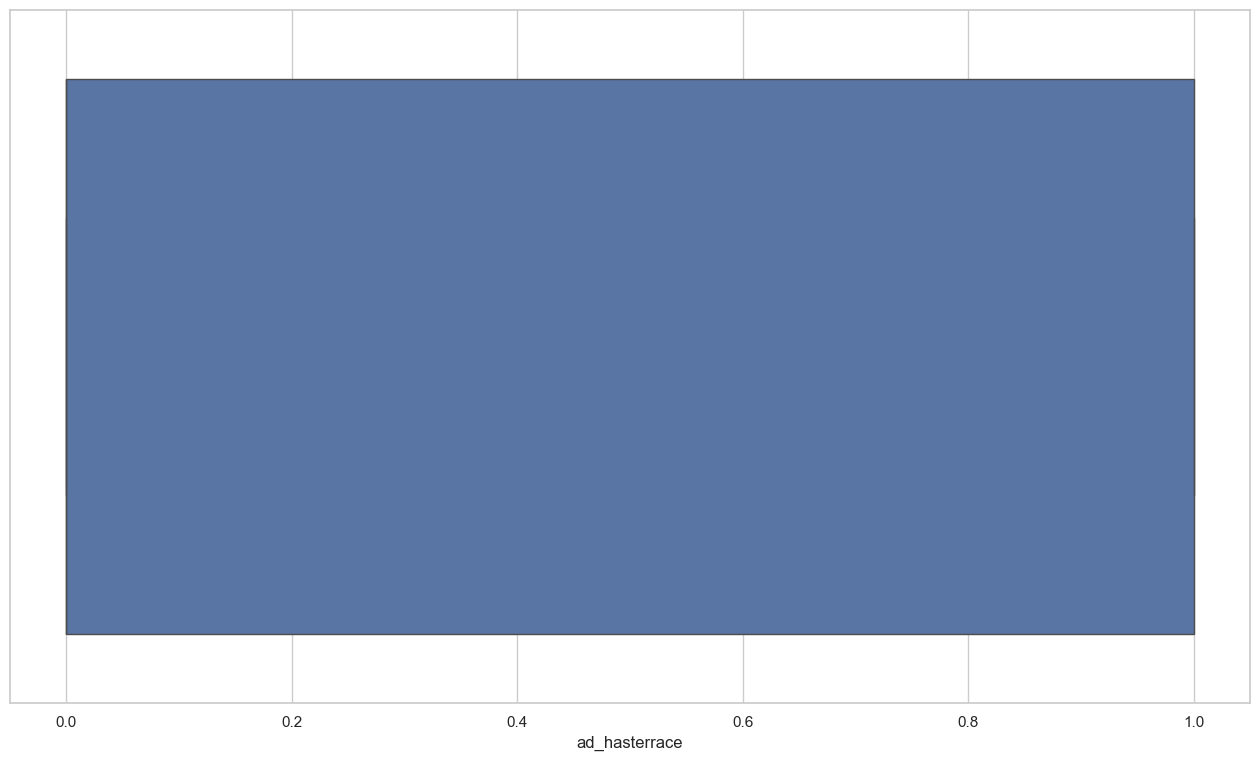

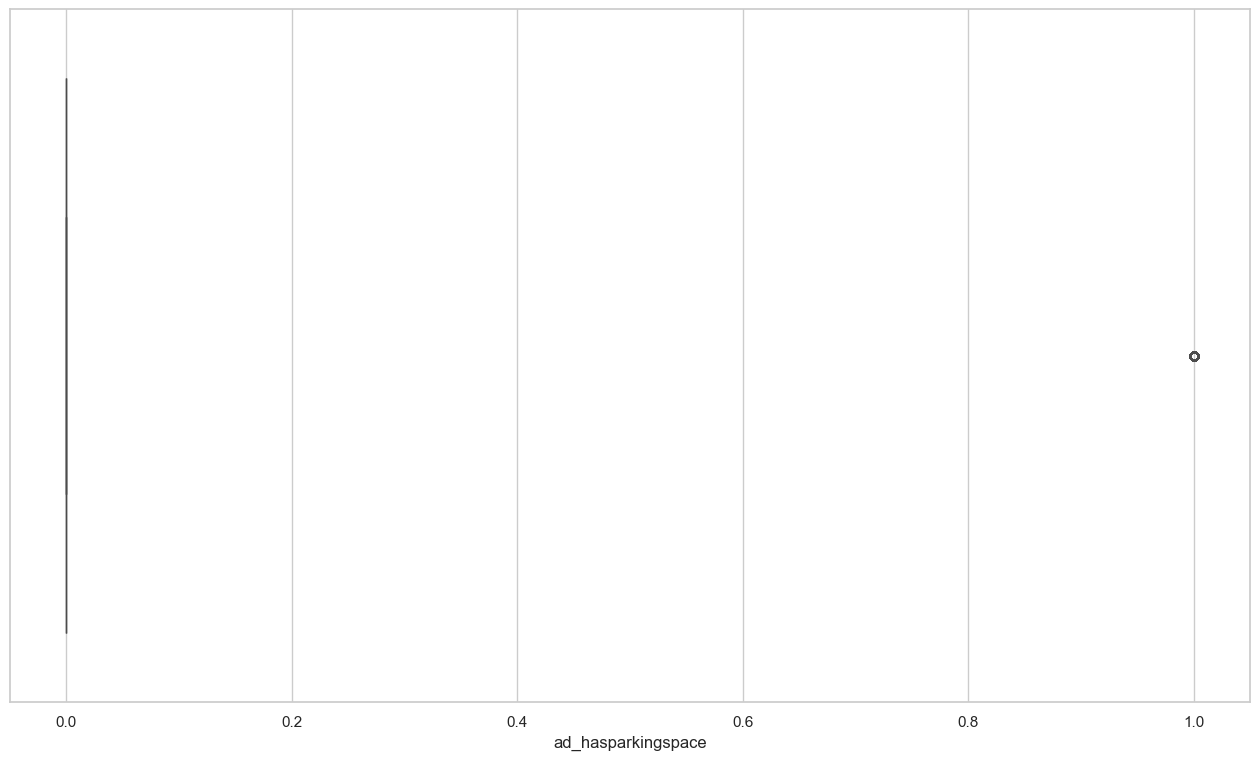

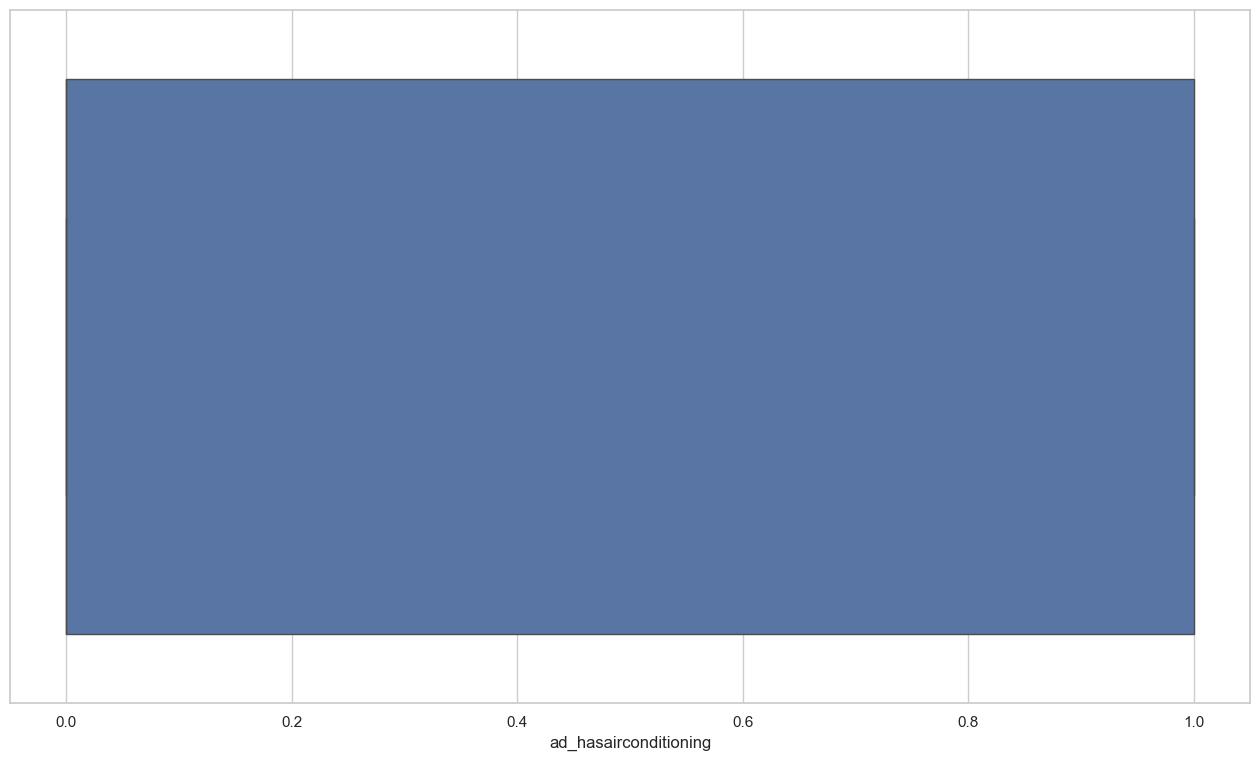

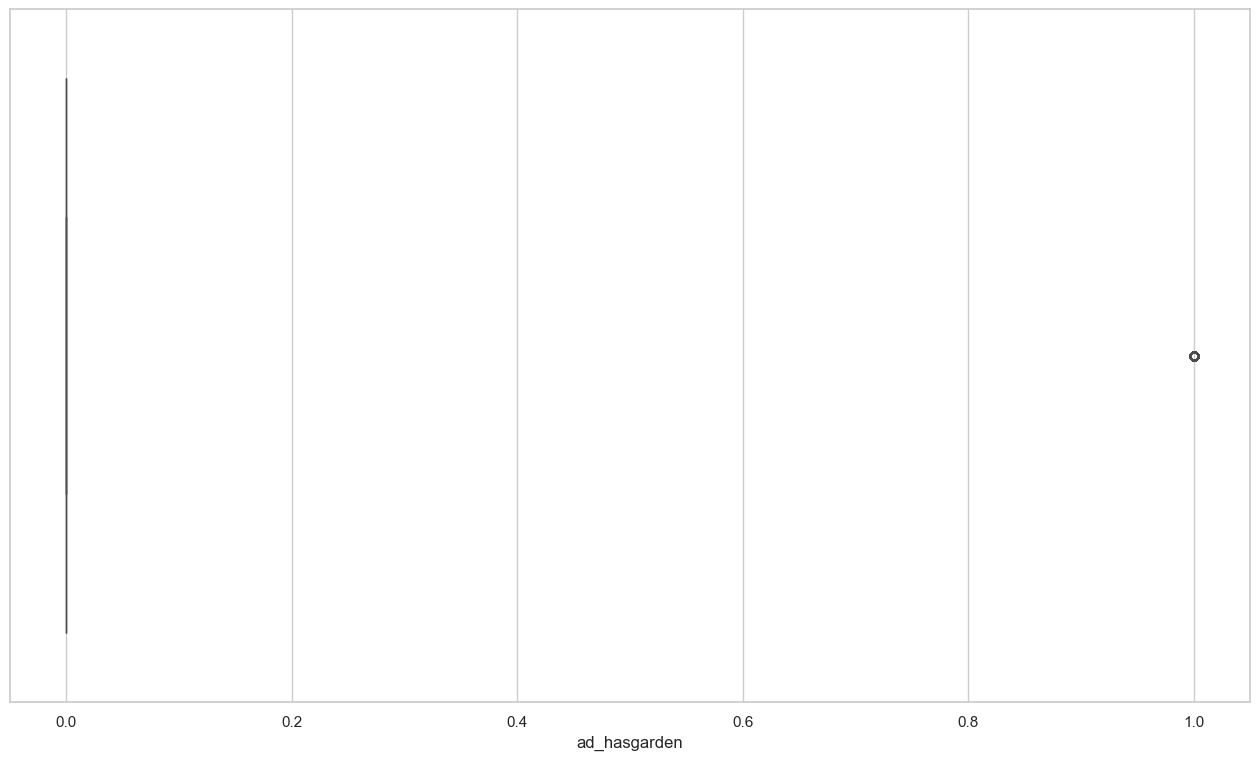

In [16]:
# Box plots for numerical columns
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=col, data=df)
    plt.show()

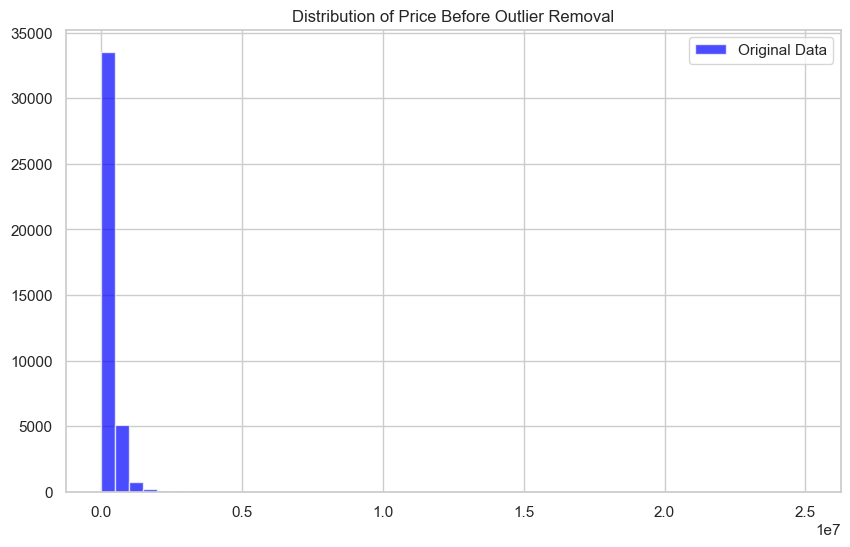

In [17]:
import matplotlib.pyplot as plt

# Plot histogram of 'price' before removing outliers
plt.figure(figsize=(10, 6))
plt.hist(df['ad_price'], bins=50, color='blue', alpha=0.7, label='Original Data')
plt.title('Distribution of Price Before Outlier Removal')
plt.legend()
plt.show()

In [18]:
df = df[df['ad_price'] <= 500001]

In [19]:

sorted_df = df[['ad_price']].sort_values(by='ad_price', ascending=False)

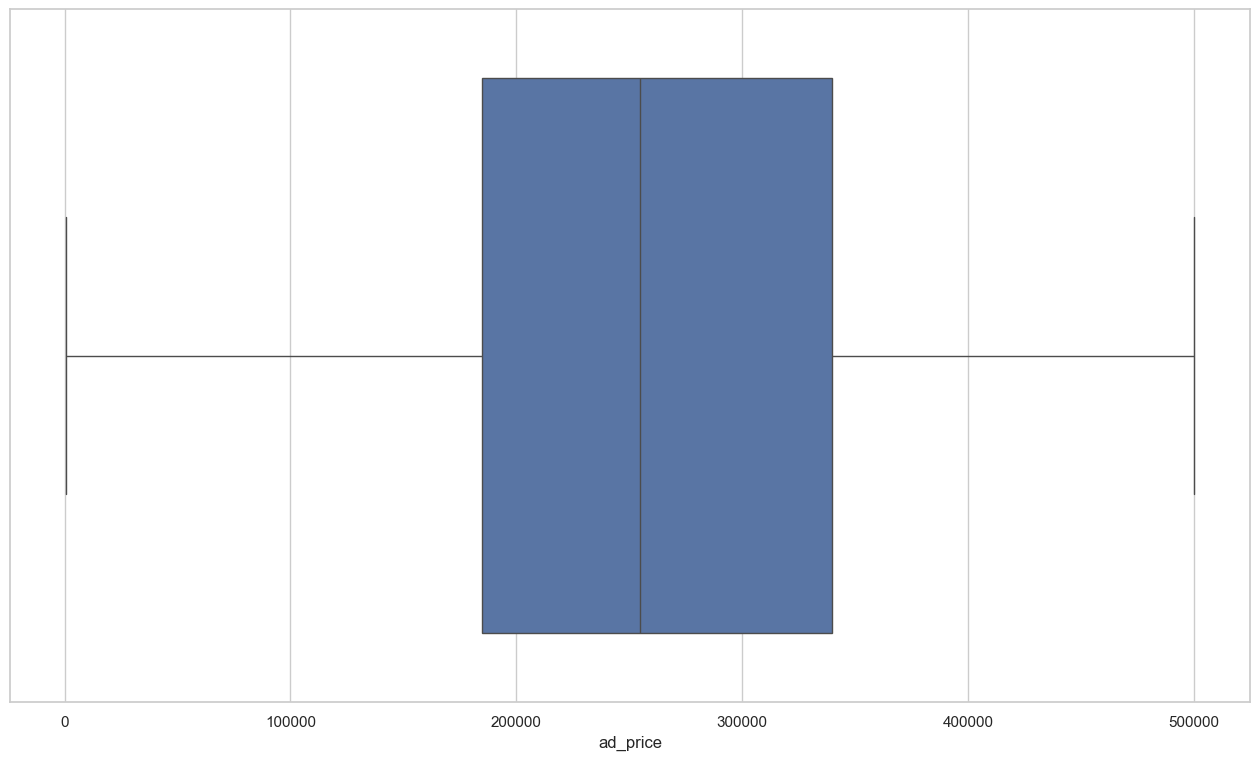

In [20]:
sns.boxplot(x='ad_price', data=df)
plt.show()


In [21]:
#Now that the outliears have been handled i will now work on the feature engineering

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.sample(10)

,ad_typology_Value,ad_price,ad_area,ad_district,ad_builttype_Value,ad_roomnumber,ad_bathnumber,ad_haslift,ad_hasswimmingpool,ad_hasheating,ad_hasterrace,ad_hasparkingspace,ad_hasairconditioning,ad_hasgarden
27187,home,290000,85,Eixample,second hand / to be restored,3,2,1,0,1,1,0,0,0
29230,home,207000,73,Sant Martí,second hand / in good condition,3,1,1,0,1,0,0,0,0
20989,home,200000,75,Sants-Montjuïc,second hand / in good condition,3,1,1,0,1,0,0,1,0
12533,home,425000,100,Les Corts,second hand / in good condition,3,2,1,0,0,0,0,1,0
7709,home,199900,76,Nou Barris,second hand / in good condition,2,2,1,0,0,0,0,1,0
5487,home,170000,71,Nou Barris,second hand / in good condition,3,1,1,0,0,0,0,0,0
26290,home,280000,50,Gràcia,second hand / in good condition,1,1,1,0,0,1,0,1,0
10600,home,222000,64,Ciutat Vella,second hand / in good condition,2,1,1,0,1,0,1,1,0
1486,home,248000,70,Sants-Montjuïc,second hand / in good condition,3,1,0,0,0,0,0,0,0
32350,home,249000,74,Ciutat Vella,second hand / in good condition,2,1,1,0,1,1,0,1,0


marco del futuro :

Aqui añade lo que te dice miqki del concat para que no este la columna desequilibrada

In [24]:
ad_typology_Value = {
    'home': 0,
    'chalet': 1,
}

df['ad_typology_Value'] = df['ad_typology_Value'].replace(ad_typology_Value)

In [25]:
builttype_mapping = {
    'new development': 0,
    'second hand / in good condition': 1,
    'second hand / to be restored': 2,
   
}

df['ad_builttype_Value'] = df['ad_builttype_Value'].replace(builttype_mapping)

In [26]:
df.head()

,ad_typology_Value,ad_price,ad_area,ad_district,ad_builttype_Value,ad_roomnumber,ad_bathnumber,ad_haslift,ad_hasswimmingpool,ad_hasheating,ad_hasterrace,ad_hasparkingspace,ad_hasairconditioning,ad_hasgarden
0,0,315000,61,Sants-Montjuïc,1,2,1,1,0,1,0,0,1,0
1,0,450000,166,Ciutat Vella,2,7,2,0,0,0,1,0,0,0
2,0,179000,58,Ciutat Vella,2,3,1,0,0,0,0,0,0,0
3,0,150000,30,Eixample,1,0,1,0,0,0,0,0,0,0
4,0,120000,62,Sants-Montjuïc,2,2,1,0,0,0,0,0,0,0


In [27]:
df_ready = pd.get_dummies(df, columns=['ad_district'], drop_first=True)
df_ready = df_ready.astype(int)

In [28]:
df_ready

,ad_typology_Value,ad_price,ad_area,ad_builttype_Value,ad_roomnumber,ad_bathnumber,ad_haslift,ad_hasswimmingpool,ad_hasheating,ad_hasterrace,...,ad_hasgarden,ad_district_Eixample,ad_district_Gràcia,ad_district_Horta Guinardó,ad_district_Les Corts,ad_district_Nou Barris,ad_district_Sant Andreu,ad_district_Sant Martí,ad_district_Sants-Montjuïc,ad_district_Sarrià-Sant Gervasi
0,0,315000,61,1,2,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,450000,166,2,7,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,179000,58,2,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,150000,30,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,120000,62,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33548,0,350000,83,1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33549,0,214000,53,1,2,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33550,0,128000,48,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33551,0,269000,90,1,4,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df_ready.columns

Index(['ad_typology_Value', 'ad_price', 'ad_area', 'ad_builttype_Value',
       'ad_roomnumber', 'ad_bathnumber', 'ad_haslift', 'ad_hasswimmingpool',
       'ad_hasheating', 'ad_hasterrace', 'ad_hasparkingspace',
       'ad_hasairconditioning', 'ad_hasgarden', 'ad_district_Eixample',
       'ad_district_Gràcia', 'ad_district_Horta Guinardó',
       'ad_district_Les Corts', 'ad_district_Nou Barris',
       'ad_district_Sant Andreu', 'ad_district_Sant Martí',
       'ad_district_Sants-Montjuïc', 'ad_district_Sarrià-Sant Gervasi'],
      dtype='object')

## h2o Prediction Model

In [ ]:
df_ready.sample(6)

,ad_typology_Value,ad_price,ad_area,ad_builttype_Value,ad_roomnumber,ad_bathnumber,ad_haslift,ad_hasswimmingpool,ad_hasheating,ad_hasterrace,...,ad_hasgarden,ad_district_Eixample,ad_district_Gràcia,ad_district_Horta Guinardó,ad_district_Les Corts,ad_district_Nou Barris,ad_district_Sant Andreu,ad_district_Sant Martí,ad_district_Sants-Montjuïc,ad_district_Sarrià-Sant Gervasi
13590,0,140000,57,1,3,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16198,0,350000,102,1,4,2,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4553,0,185000,76,1,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
24878,0,270000,82,1,2,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
17490,0,340000,77,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19016,0,385000,131,1,3,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
import h2o

In [ ]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.391-b13, mixed mode)
  Starting server from C:\Users\Marco\miniconda3\envs\ironhack\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Marco\AppData\Local\Temp\tmpb4_n5bpu
  JVM stdout: C:\Users\Marco\AppData\Local\Temp\tmpb4_n5bpu\h2o_Marco_started_from_python.out
  JVM stderr: C:\Users\Marco\AppData\Local\Temp\tmpb4_n5bpu\h2o_Marco_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,7 months and 7 days
H2O_cluster_name:,H2O_from_python_Marco_luqoym
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.380 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [ ]:
import h2o

h2o.cluster().show_status()


model_path = "../StackedEnsemble_AllModels_1_AutoML_1_20231206_103316"  # Provide the path to your H2O model

H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,7 months and 7 days
H2O_cluster_name:,H2O_from_python_Marco_luqoym
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.380 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [ ]:
import h2o
print(h2o.__version__)


3.40.0.4


In [62]:
df_ready

,ad_typology_Value,ad_price,ad_area,ad_builttype_Value,ad_roomnumber,ad_bathnumber,ad_haslift,ad_hasswimmingpool,ad_hasheating,ad_hasterrace,...,ad_hasgarden,ad_district_Eixample,ad_district_Gràcia,ad_district_Horta Guinardó,ad_district_Les Corts,ad_district_Nou Barris,ad_district_Sant Andreu,ad_district_Sant Martí,ad_district_Sants-Montjuïc,ad_district_Sarrià-Sant Gervasi
0,0,315000,61,1,2,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,450000,166,2,7,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,179000,58,2,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,150000,30,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,120000,62,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33548,0,350000,83,1,4,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33549,0,214000,53,1,2,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33550,0,128000,48,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
33551,0,269000,90,1,4,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
# Load the H2O model
loaded_model = h2o.load_model('C:/Users/Marco\Desktop/IronHack/projects/final_project/StackedEnsemble_AllModels_1_AutoML_1_20231206_103316')

# Convert the Pandas DataFrame to an H2OFrame
h2o_df = h2o.H2OFrame(df_ready)

# Perform any additional processing or predictions using the loaded model and H2OFrame
# For example:
predictions = loaded_model.predict(h2o_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [91]:
from sklearn.metrics import r2_score

# Assuming y_actual contains the actual values
# Replace y_actual with your actual values
y_actual = df_ready['ad_price']


predictions_df = predictions.as_data_frame()

# Extract the predicted values from the Pandas DataFrame
y_pred = predictions_df['predict']

# Calculate R2 score
r2 = r2_score(y_actual, y_pred)

# Print the R2 score
print(f'R-squared (R2) Score: {r2}')


R-squared (R2) Score: 0.8499174613931375


In [92]:
mse = mean_squared_error(y_actual, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {round(rmse)} €')

Root Mean Squared Error: 40671 €
